## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (1893)
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data_df
#mouse_metadata #249
#study_results #1893

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_data_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df_dup = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
combined_data_df_dup["Mouse ID"].drop_duplicates()

908    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate mouse df
combined_data_df_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# No duplicate data frame would suppress mouse id found in the duplicate mouse df
combined_data_df_no_dup = combined_data_df.loc[(~combined_data_df["Mouse ID"].isin(combined_data_df_dup["Mouse ID"]))]
combined_data_df_no_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_df_no_dup["Mouse ID"].unique())

248

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat1 = combined_data_df_no_dup.groupby(["Drug Regimen"])
stat1["Tumor Volume (mm3)"].mean()
stat1["Tumor Volume (mm3)"].median()
stat1["Tumor Volume (mm3)"].var()
stat1["Tumor Volume (mm3)"].std()
stat1["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summaryStat = pd.DataFrame({"Mean":stat1["Tumor Volume (mm3)"].mean(),"Median":stat1["Tumor Volume (mm3)"].median(),"Variance":stat1["Tumor Volume (mm3)"].var(),"Standard Deviation":stat1["Tumor Volume (mm3)"].std(),"SEM":stat1["Tumor Volume (mm3)"].sem()})
summaryStat
summaryStat.rename_axis("")

,Mean,Median,Variance,Standard Deviation,SEM
,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Renaming aggregate columns using dictionary unpacking
combined_data_df_no_dup.groupby(["Drug Regimen"]).agg(**{'Mean':("Tumor Volume (mm3)","mean"),'Median':("Tumor Volume (mm3)","median"),'Variance':("Tumor Volume (mm3)","var"),'Standard Deviation':("Tumor Volume (mm3)","std"),'SEM':("Tumor Volume (mm3)","sem")})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

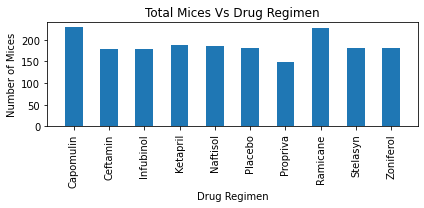

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = np.arange(len(stat1["Mouse ID"]))
stat1["Mouse ID"].count()
total_mice_plot = stat1["Mouse ID"].count().plot(kind="bar", figsize=(6,3))
plt.title("Total Mices Vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mices")
plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(stat1["Mouse ID"].count()) + 10)
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

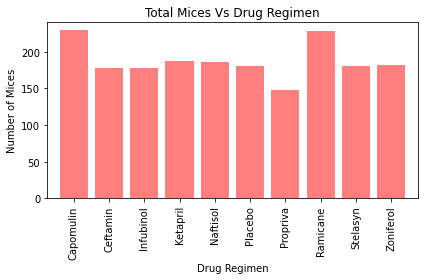

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
# Tell matplotlib where we would like to place each of our x axis headers
x_axis = np.arange(len(stat1["Mouse ID"]))
plt.bar(x_axis, stat1["Mouse ID"].count(), color='r', alpha=0.5, align="center")
plt.xticks(x_axis, stat1["Drug Regimen"].max(), rotation="vertical")

plt.title("Total Mices Vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mices")

plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(stat1["Mouse ID"].count()) + 10)
plt.tight_layout()
plt.show

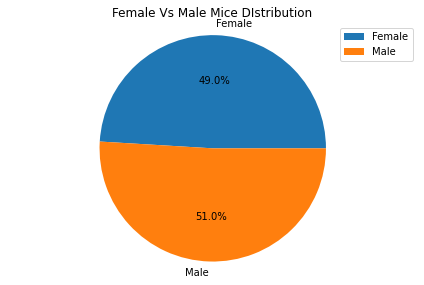

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_group = combined_data_df_no_dup.groupby(["Sex"])
mice_group["Mouse ID"].count() 

mice_sex_pie = mice_group["Mouse ID"].count().plot(kind="pie",autopct="%1.1f%%",title="Female Vs Male Mice DIstribution",legend=True)
mice_sex_pie.set_ylabel("")
plt.legend(mice_group.Sex.max(),loc="best")
plt.tight_layout()
plt.axis("equal")
plt.show()


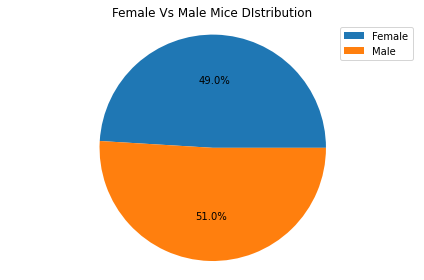

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_group["Mouse ID"].count(),autopct="%1.1f%%")
mice_sex_pie.set_ylabel("")
plt.legend(mice_group.Sex.max(),loc="best")
plt.title("Female Vs Male Mice DIstribution")
plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Group by Drug Regimen and Mouse ID and only interested in the maximum Timepoint row
finalTimePointPerMouseDrug = combined_data_df_no_dup[combined_data_df_no_dup["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])].groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()

finalTimePointPerMouseDrug
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lastTimePoint = pd.merge(combined_data_df_no_dup,finalTimePointPerMouseDrug,on=["Drug Regimen","Mouse ID","Timepoint"])
lastTimePoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = list(lastTimePoint["Drug Regimen"].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumorVolDataList = [[],[],[],[]]

outlier_TumorVolDataList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in range(len(treatmentList)):
    tumorVolDataList[drug] = lastTimePoint[lastTimePoint["Drug Regimen"]==treatmentList[drug]]["Tumor Volume (mm3)"]
    quartiles = tumorVolDataList[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {treatmentList[drug]}")
    # Determine outliers using upper and lower bounds
    print(f"   The lower quartile of tumor volumes is: {lowerq}")
    print(f"   The upper quartile of tumor volumes is: {upperq}")
    print(f"   The interquartile range of tumor volumes is : {iqr}")
    print(f"   The  median of tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_TumorVolDataList = lastTimePoint[(lastTimePoint["Drug Regimen"]==treatmentList[drug]) & ((lastTimePoint["Tumor Volume (mm3)"] < lower_bound) | (lastTimePoint["Tumor Volume (mm3)"] > upper_bound))]["Tumor Volume (mm3)"]

    #outlier_TumorVolDataList = tumorVolDataList[drug][(tumorVolDataList[drug] < lower_bound) | (tumorVolDataList[drug] > upper_bound)]

    print(f"   Values below {lower_bound} could be outliers.")
    print(f"   Values above {upper_bound} could be outliers.")    
    print(f"")    

    if len(outlier_TumorVolDataList) == 0:
        print(f"   No outliers tumor volumes")
    else:
        print(f"   Possible outliers tumor volumes is: {outlier_TumorVolDataList}")

    print(f"")    




    

For Ramicane
   The lower quartile of tumor volumes is: 31.56046955
   The upper quartile of tumor volumes is: 40.65900627
   The interquartile range of tumor volumes is : 9.098536719999998
   The  median of tumor volumes is: 36.56165229 
   Values below 17.912664470000003 could be outliers.
   Values above 54.30681135 could be outliers.

   No outliers tumor volumes

For Capomulin
   The lower quartile of tumor volumes is: 32.37735684
   The upper quartile of tumor volumes is: 40.1592203
   The interquartile range of tumor volumes is : 7.781863460000004
   The  median of tumor volumes is: 38.125164399999996 
   Values below 20.70456164999999 could be outliers.
   Values above 51.83201549 could be outliers.

   No outliers tumor volumes

For Infubinol
   The lower quartile of tumor volumes is: 54.04860769
   The upper quartile of tumor volumes is: 65.52574285
   The interquartile range of tumor volumes is : 11.477135160000003
   The  median of tumor volumes is: 60.16518046 
   Values b

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcbff57d370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbff57da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcbff56dfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcbff584130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbff584490>,
 'means': []}

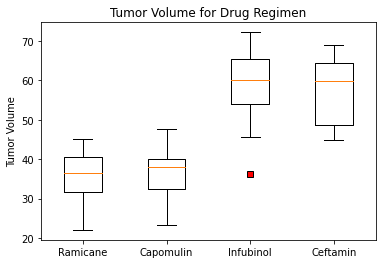

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimen')
ax1.set_ylabel('Tumor Volume')
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot (tumorVolDataList, labels=treatmentList, flierprops=red_square)



## Line and Scatter Plots

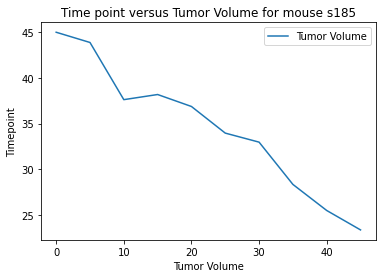

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
linePlot = combined_data_df_no_dup.loc[(combined_data_df_no_dup['Drug Regimen']=='Capomulin') & (combined_data_df_no_dup['Mouse ID']=='s185')]
plt.plot(linePlot["Timepoint"],linePlot["Tumor Volume (mm3)"],label="Tumor Volume")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")
plt.title("Time point versus Tumor Volume for mouse " + linePlot["Mouse ID"].max())
plt.legend(loc="best")

<function matplotlib.pyplot.show(close=None, block=None)>

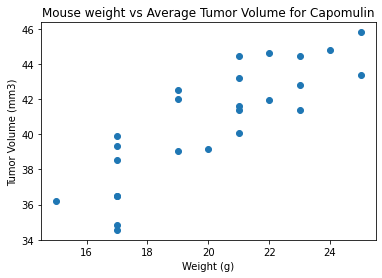

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter = combined_data_df_no_dup.loc[(combined_data_df_no_dup['Drug Regimen']=='Capomulin')].groupby("Mouse ID")
x_values = scatter.mean()["Weight (g)"]
y_values =  scatter.mean()["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse weight vs Average Tumor Volume for Capomulin')
plt.show

## Correlation and Regression

Correlation coefficient=0.841936342469472
y = 0.95x + 21.55


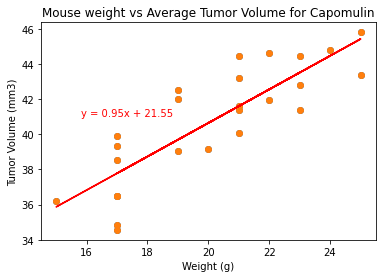

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue}")
#print(correlation[0],2)
print(line_eq)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse weight vs Average Tumor Volume for Capomulin')
plt.show()


Correlation coefficient=0.8060300656584944
y = 0.77x + 25.16


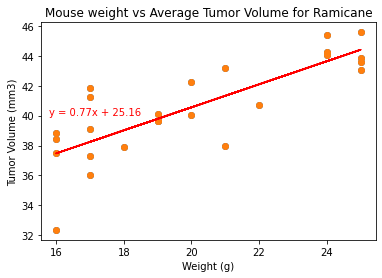

In [103]:
# Now plot the graph for Ramicane and compare its r value with Capomulin
scatterR = combined_data_df_no_dup.loc[(combined_data_df_no_dup['Drug Regimen']=='Ramicane')].groupby("Mouse ID")
x_values = scatterR.mean()["Weight (g)"]
y_values =  scatterR.mean()["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,40),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue}")
#print(correlation[0],2)
print(line_eq)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse weight vs Average Tumor Volume for Ramicane')
plt.show()